[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


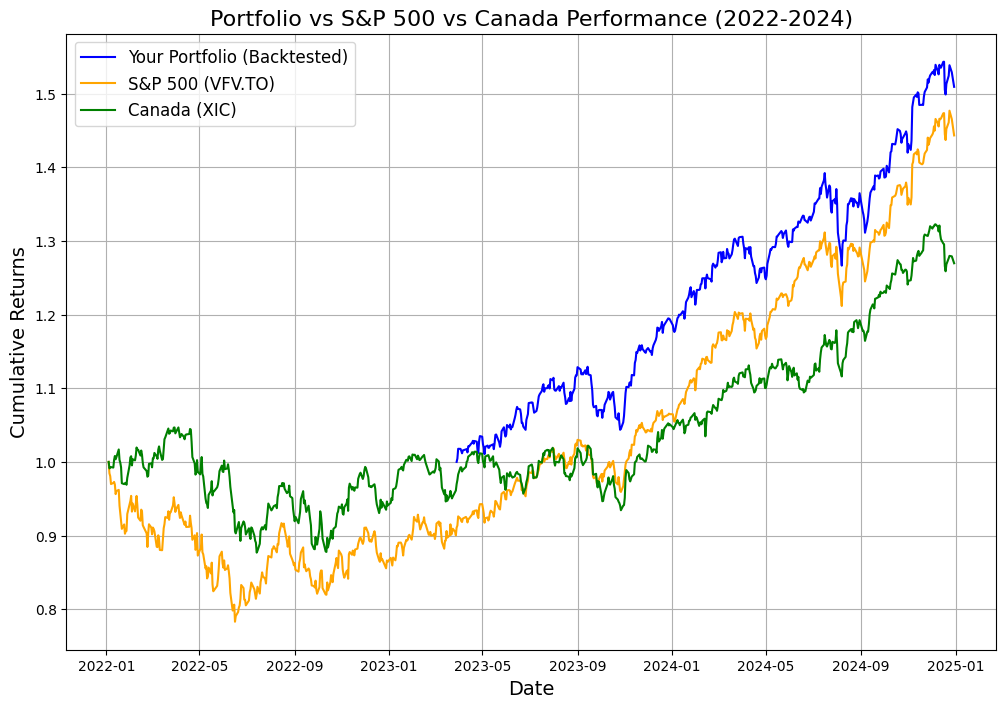

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define tickers, weights, and dates
tickers = ["VFV.TO", "QQC.TO", "XIC.TO", "INTC.NE", "BRK.NE", "VISA.NE", "BN.TO"]
weights = {"VFV.TO": 0.45, "QQC.TO": 0.15, "XIC.TO": 0.20, "INTC.NE": 0.05, 
           "BRK.NE": 0.05, "VISA.NE": 0.05, "BN.TO": 0.05}
start_date = "2022-01-01" 
end_date = "2024-12-31" 

# Fetch portfolio data
data = yf.download(tickers, start=start_date, end=end_date)['Close']
# Ensure data is in the correct order by reindexing with the original tickers
data = data[tickers] 
data.dropna(inplace=True)  # Remove missing data

# Normalize portfolio data
normalized_data = data / data.iloc[0]
portfolio_returns = (normalized_data * list(weights.values())).sum(axis=1)

# Fetch VFV.TO data (as your S&P 500 proxy)
vfv = yf.download("VFV.TO", start=start_date, end=end_date)['Close'] 
vfv.dropna(inplace=True)
normalized_vfv = vfv / vfv.iloc[0]

# Fetch XIC data (XIC.TO as a proxy for Canadian market)
xic = yf.download("XIC.TO", start=start_date, end=end_date)['Close'] 
xic.dropna(inplace=True) 
normalized_xic = xic / xic.iloc[0]

# Plot portfolio vs S&P 500 (VFV.TO) vs Canada (XIC)
plt.figure(figsize=(12, 8))
plt.plot(portfolio_returns, label="Your Portfolio (Backtested)", color="blue")
plt.plot(normalized_vfv, label="S&P 500 (VFV.TO)", color="orange")
plt.plot(normalized_xic, label="Canada (XIC)", color="green")
plt.title("Portfolio vs S&P 500 vs Canada Performance (2022-2024)", fontsize=16) 
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Returns", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


In [129]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define tickers, weights, and dates
tickers = ["VFV.TO", "QQC.TO", "XIC.TO", "INTC", "BRK-B", "V", "BN.TO"]
weights = {"VFV.TO": 0.45, "QQC.TO": 0.15, "XIC.TO": 0.20, "INTC": 0.05,
           "BRK-B": 0.05, "V": 0.05, "BN.TO": 0.05}
start_date = "2022-06-01"
end_date = "2024-12-31"

# Fetch portfolio data
data = yf.download(tickers, start=start_date, end=end_date)['Close']
data = data[tickers]
#data.dropna(inplace=True)  # Remove missing data

# Fetch USD/CAD exchange rate data
usd_cad = yf.download("CAD=X", start=start_date, end=end_date)['Close']
#usd_cad.dropna(inplace=True)

# Align USD/CAD exchange rate with the portfolio data (use common dates)
usd_cad = usd_cad.reindex(data.index, method='ffill')  # Forward fill missing values

# Normalize portfolio data
normalized_data = data / data.iloc[0]
portfolio_returns = (normalized_data * list(weights.values())).sum(axis=1)

# Normalize S&P 500 (SPY)
spy = yf.download("SPY", start=start_date, end=end_date)['Close']
spy.dropna(inplace=True)
normalized_spy = spy / spy.iloc[0]

normalized_spy_cad = normalized_spy * (usd_cad / usd_cad.iloc[0])

# Adjust USD-denominated stocks (INTC, BRK-B, V) to CAD
usd_tickers = ["INTC", "BRK-B", "V"]
usd_data = yf.download(usd_tickers, start=start_date, end=end_date)['Close']
#usd_data.dropna(inplace=True)

# Normalize USD stocks
normalized_usd_data = usd_data / usd_data.iloc[0]

# Adjust each USD stock to CAD using the exchange rate
for ticker in usd_tickers:
    # Filter common dates for both USD stock and USD/CAD data
    common_dates = usd_cad.index.intersection(normalized_usd_data[ticker].index)
    
    # Align both datasets to common dates
    aligned_usd_cad = usd_cad.loc[common_dates]
    aligned_usd_data = normalized_usd_data[ticker].loc[common_dates]
    
    # Adjust the USD stock to CAD
    normalized_usd_data[ticker] = aligned_usd_data * (aligned_usd_cad / usd_cad.iloc[0])

# Update normalized portfolio data with adjusted USD data
adjusted_normalized_data = normalized_data.copy()
for ticker in usd_tickers:
    adjusted_normalized_data[ticker] = normalized_usd_data[ticker]

# Recalculate portfolio returns after adjusting USD stocks to CAD
portfolio_returns_adjusted = (adjusted_normalized_data * list(weights.values())).sum(axis=1)

# Plot portfolio vs S&P 500 vs Canada performance in CAD
plt.figure(figsize=(12, 8))
plt.plot(portfolio_returns_adjusted, label="Your Portfolio (Backtested, CAD-adjusted)", color="blue")
plt.plot(normalized_spy_cad, label="S&P 500 (SPY, CAD-adjusted)", color="orange")
plt.plot(normalized_data["VFV.TO"], label="Canada (VFV.TO, CAD)", color="green")
plt.title("Portfolio vs S&P 500 vs Canada Performance (2022-2024, CAD-adjusted)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Returns", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  3 of 3 completed


ValueError: Columns must be same length as key

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


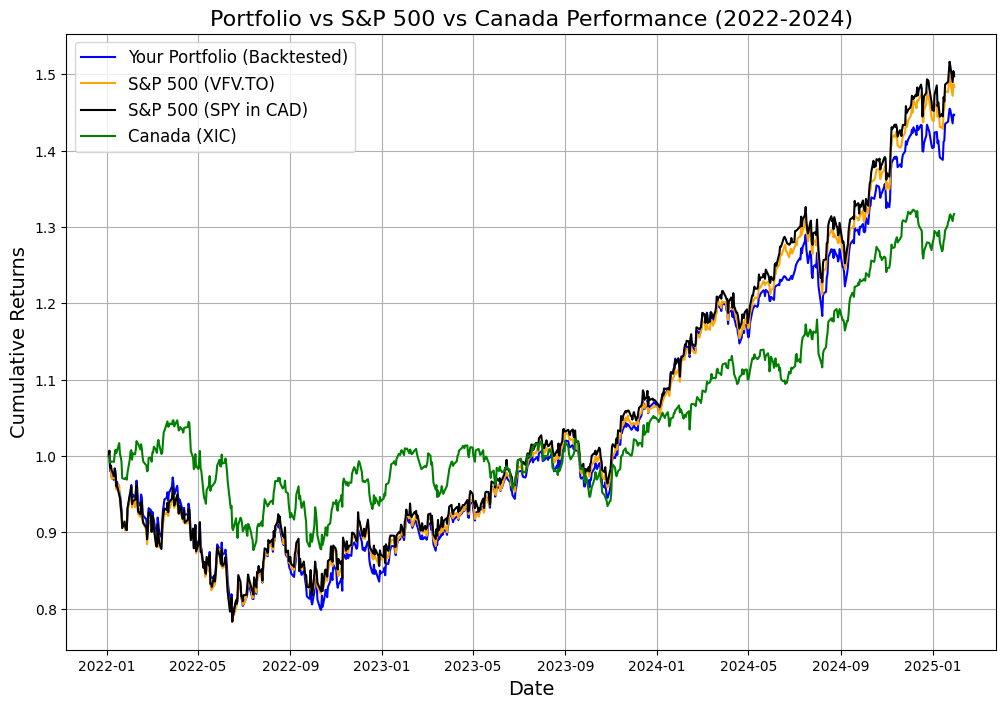

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define tickers, weights, and dates
tickers = ["VFV.TO", "QQQ", "XIC.TO", "AMD", "BRK-B", "V", "BN.TO"]
weights = {"VFV.TO": 0.45, "QQQ": 0.15, "XIC.TO": 0.20, "AMD": 0.05, 
           "BRK-B": 0.05, "V": 0.05, "BN.TO": 0.05}
start_date = "2022-01-01" 
end_date = "2025-01-30" 

# Fetch portfolio data
data = yf.download(tickers, start=start_date, end=end_date)['Close']
# Ensure data is in the correct order by reindexing with the original tickers
data = data[tickers] 

data.dropna(inplace=True)  # Remove missing data

# Fetch USD/CAD exchange rate for USD-denominated stocks
fx_data = yf.download("CAD=X", start=start_date, end=end_date)['Close']
fx_data.dropna(inplace=True)

# Convert USD-denominated stocks (e.g., BRK.NE, INTC.NE, VISA.NE) to CAD
usd_stocks = ["AMD", "BRK-B", "V","QQQ"]
for stock in usd_stocks:
    data[stock] = data[stock] * fx_data['CAD=X']

# Normalize portfolio data
normalized_data = data / data.iloc[0]
portfolio_returns = (normalized_data * list(weights.values())).sum(axis=1)

# Fetch VFV.TO data (as your S&P 500 proxy)
vfv = yf.download("VFV.TO", start=start_date, end=end_date)['Close'] 
vfv.dropna(inplace=True)
normalized_vfv = vfv / vfv.iloc[0]

# Fetch spy data (as your S&P 500 proxy)
spy = yf.download("SPY", start=start_date, end=end_date)['Close'] 
#spy.dropna(inplace=True)
spy = spy ['SPY'] * fx_data['CAD=X']
spy.dropna(inplace=True)
normalized_spy = spy / spy.iloc[0]


# Fetch XIC data (XIC.TO as a proxy for Canadian market)
xic = yf.download("XIC.TO", start=start_date, end=end_date)['Close'] 
xic.dropna(inplace=True) 
normalized_xic = xic / xic.iloc[0]

# Plot portfolio vs S&P 500 (VFV.TO) vs Canada (XIC)
plt.figure(figsize=(12, 8))
plt.plot(portfolio_returns, label="Your Portfolio (Backtested)", color="blue")
plt.plot(normalized_vfv, label="S&P 500 (VFV.TO)", color="orange")
plt.plot(normalized_spy, label="S&P 500 (SPY in CAD)", color="black")
plt.plot(normalized_xic, label="Canada (XIC)", color="green")
plt.title("Portfolio vs S&P 500 vs Canada Performance (2022-2024)", fontsize=16) 
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Returns", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


In [167]:
data[stock]

Date
2024-01-02    28.155184
2024-01-03    27.691359
2024-01-04    27.582802
2024-01-05    27.572933
2024-01-08    28.431503
                ...    
2024-12-20    11.480000
2024-12-23    11.860000
2024-12-24    11.900000
2024-12-27    11.920000
2024-12-30    11.640000
Name: INTC.NE, Length: 251, dtype: float64

In [170]:
fx_data['CAD=X']

Date
2024-01-01    1.32392
2024-01-02    1.32420
2024-01-03    1.33220
2024-01-04    1.33477
2024-01-05    1.33550
               ...   
2024-12-24    1.43742
2024-12-25    1.43620
2024-12-26    1.43536
2024-12-27    1.44104
2024-12-30    1.44034
Name: CAD=X, Length: 261, dtype: float64

In [183]:
yf.download(tickers, start=start_date, end=end_date)

[*********************100%***********************]  7 of 7 completed


Price           Close                                                \
Ticker          BN.TO       BRK-B       INTC     QQC.TO           V   
Date                                                                  
2018-01-02  27.743389  197.220001  39.330383        NaN  109.311737   
2018-01-03  27.902983  199.789993  37.995586        NaN  110.399963   
2018-01-04  28.098614  200.690002  37.298805        NaN  110.810455   
2018-01-05  27.882391  201.419998  37.559055        NaN  113.464264   
2018-01-08  27.830906  202.740005  37.559055        NaN  113.922462   
...               ...         ...        ...        ...         ...   
2024-12-23  81.980003  454.350006  20.200001  36.707069  317.220001   
2024-12-24  82.790001  458.660004  20.400000  37.186508  320.649994   
2024-12-26        NaN  459.079987  20.440001        NaN  320.910004   
2024-12-27  82.430000  456.510010  20.299999  36.767002  318.660004   
2024-12-30  82.360001  452.160004  19.820000  36.150002  315.309998   

Price                                   High                         ...  \
Ticker          VFV.TO     XIC.TO      BN.TO       BRK-B       INTC  ...   
Date                                                                 ...   
2018-01-02   54.295677  21.230873  28.083167  198.869995  39.372361  ...   
2018-01-03   54.822376  21.329397  28.041983  200.000000  38.793108  ...   
2018-01-04   54.904106  21.370443  28.144947  202.130005  37.483495  ...   
2018-01-05   54.885948  21.304764  28.108910  201.669998  37.903249  ...   
2018-01-08   55.049404  21.263716  27.939016  203.070007  37.643004  ...   
...                ...        ...        ...         ...        ...  ...   
2024-12-23  152.191193  39.403477  82.000000  454.549988  20.230000  ...   
2024-12-24  153.846863  39.502880  82.790001  458.989990  20.400000  ...   
2024-12-26         NaN        NaN        NaN  459.480011  20.670000  ...   
2024-12-27  152.649994  39.483002  83.099998  461.130005  20.610001  ...   
2024-12-30  150.350006  39.189999  82.750000  454.690002  20.110001  ...   

Price             Open                            Volume             \
Ticker               V      VFV.TO     XIC.TO      BN.TO      BRK-B   
Date                                                                  
2018-01-02  109.369011   54.304757  21.115934  1257287.0  4113000.0   
2018-01-03  109.731736   54.531783  21.263719  1004568.0  3526700.0   
2018-01-04  110.972736   54.967673  21.477172  1039080.0  3900000.0   
2018-01-05  111.679151   54.631680  21.395073  1079715.0  4207600.0   
2018-01-08  113.225605   54.949512  21.296556   765950.0  3887900.0   
...                ...         ...        ...        ...        ...   
2024-12-23  315.649994  151.951830  39.224550  1460600.0  3836000.0   
2024-12-24  318.170013  152.360751  39.403475   416800.0  1761200.0   
2024-12-26  319.769989         NaN        NaN        NaN  2159600.0   
2024-12-27  319.269989  153.477826  39.473059  1475900.0  3237700.0   
2024-12-30  314.679993  150.889999  39.230000  2174600.0  2831400.0   

Price                                                             
Ticker             INTC    QQC.TO          V    VFV.TO    XIC.TO  
Date                                                              
2018-01-02   23370800.0       NaN  6080900.0   84400.0  179239.0  
2018-01-03  116479000.0       NaN  6946100.0   41600.0  160190.0  
2018-01-04   89209100.0       NaN  7805300.0   54500.0   74321.0  
2018-01-05   41824000.0       NaN  8590500.0   47700.0  151011.0  
2018-01-08   33733800.0       NaN  6660700.0   51500.0  165717.0  
...                 ...       ...        ...       ...       ...  
2024-12-23   57988400.0   87200.0  7984600.0  268900.0  368500.0  
2024-12-24   29884000.0   88800.0  2684100.0  246300.0   86600.0  
2024-12-26   39846200.0       NaN  2856000.0       NaN       NaN  
2024-12-27   48260800.0  153000.0  3489200.0  347900.0  158000.0  
2024-12-30   59608100.0  168900.0  3478500.0  415800.0  199500.0  

[1793 

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


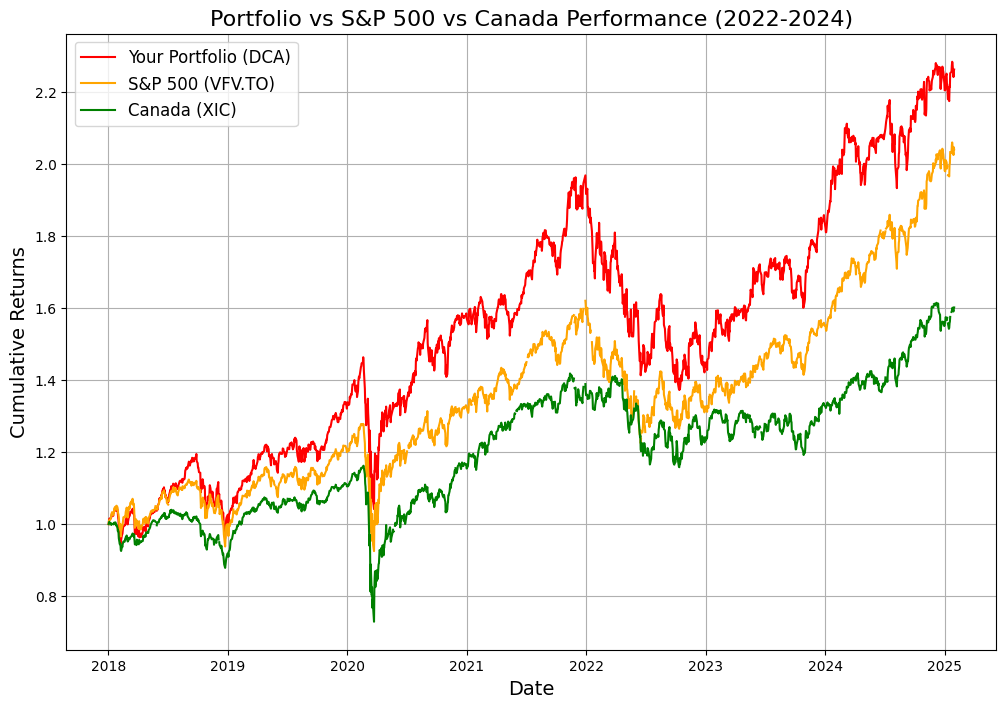

In [211]:
#Introduced initial CAD amount
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define tickers, weights, and dates
tickers = ["VFV.TO", "QQQ", "XIC.TO", "AMD", "BRK-B", "V", "BN.TO"]
weights = {"VFV.TO": 0.45, "QQQ": 0.15, "XIC.TO": 0.20, "AMD": 0.05, 
           "BRK-B": 0.05, "V": 0.05, "BN.TO": 0.05}
start_date = "2018-01-01" 
end_date = "2025-01-30" 

initial_investment = 10000  # Initial CAD amount
dca_amount = 700  # CAD invested at each interval
dca_interval = "ME"  # Monthly investment

# Fetch portfolio data
data = yf.download(tickers, start=start_date, end=end_date)['Close']
# Ensure data is in the correct order by reindexing with the original tickers
data = data[tickers] 

data.dropna(inplace=True)  # Remove missing data

# Fetch USD/CAD exchange rate for USD-denominated stocks
fx_data = yf.download("CAD=X", start=start_date, end=end_date)['Close']
fx_data.dropna(inplace=True)

# Convert USD-denominated stocks (e.g., BRK.NE, INTC.NE, VISA.NE) to CAD
usd_stocks = ["AMD", "BRK-B", "V","QQQ"]
for stock in usd_stocks:
    data[stock] = data[stock] * fx_data['CAD=X']

# Generate monthly investment dates, adjusting for holidays and weekends
investment_dates = pd.date_range(start=start_date, end=end_date, freq=dca_interval)  # Last day of month

# Adjust dates to the last available market day
adjusted_dates = [data.index[data.index.get_indexer([date], method='pad')[0]] for date in investment_dates]

# Create investment series with adjusted dates
investment_series = pd.Series(dca_amount, index=adjusted_dates)
investment_series.iloc[0] = initial_investment  # First investment is the initial amount

# Create portfolio value tracker
portfolio_value = pd.Series(0.00, index=data.index)
total_invested = pd.Series(0.00, index=data.index)  # Track total invested money
invested_capital = initial_investment  # Track total money invested
holdings = {ticker: 0 for ticker in tickers}

# Find the first available trading day and invest initial amount
first_trade_day = data.index[0]
for ticker, weight in weights.items():
    shares = (initial_investment * weight) / data.loc[first_trade_day, ticker]
    holdings[ticker] += shares
    
# Simulate DCA
for date in data.index:  # Iterate over all trading days  
    # If it's an investment day, buy new shares
    if date in investment_series.index:    
        invested_capital += investment_series[date]
        for ticker, weight in weights.items():
            shares = (investment_series[date] * weight) / data.loc[date, ticker]
            holdings[ticker] += shares
    
    # Calculate daily portfolio value based on current holdings
    daily_value = sum(holdings[ticker] * data.loc[date, ticker] for ticker in tickers)
    portfolio_value.loc[date] = daily_value # Track total portfolio value daily
    total_invested.loc[date] = invested_capital  # Track total money invested

# Forward-fill to ensure all missing values are filled
portfolio_value.ffill(inplace=True)
total_invested.ffill(inplace=True)

# Normalize portfolio data
normalized_data = data / data.iloc[0]
normalized_portfolio = portfolio_value / total_invested
portfolio_returns = (normalized_data * list(weights.values())).sum(axis=1)

# Fetch market index data
vfv = yf.download("VFV.TO", start=start_date, end=end_date)['Close']  # In CAD
spy = yf.download("SPY", start=start_date, end=end_date)['Close']  # In USD
xic = yf.download("XIC.TO", start=start_date, end=end_date)['Close']  # In CAD

# Drop NaN values
vfv.dropna(inplace=True)
spy.dropna(inplace=True)
xic.dropna(inplace=True)

# Adjust SPY to CAD (apply FX rate, align dates)
spy = spy ['SPY'] * fx_data['CAD=X']
spy.dropna(inplace=True)  # Remove NaNs that may appear due to FX data gaps

# Initialize DCA investment trackers
vfv_value = pd.Series(0.00, index=vfv.index)
spy_value = pd.Series(0.00, index=spy.index)
xic_value = pd.Series(0.00, index=xic.index)

# Start with initial investment
vfv_holdings = initial_investment / vfv.iloc[0]
spy_holdings = initial_investment / spy.iloc[0]
xic_holdings = initial_investment / xic.iloc[0]

vfv_capital = initial_investment
spy_capital = initial_investment
xic_capital = initial_investment

vfv_invested = pd.Series(0.00, index=vfv.index)
spy_invested = pd.Series(0.00, index=spy.index)
xic_invested = pd.Series(0.00, index=xic.index)


# Apply DCA on benchmark indexes
for date in data.index:
    if date in investment_series.index:
        # Only invest if it's a valid trading date for each index
        if date in vfv.index:
            vfv_holdings += dca_amount / vfv.loc[date]
            vfv_capital += dca_amount
        if date in spy.index:
            spy_holdings += dca_amount / spy.loc[date]
            spy_capital += dca_amount
        if date in xic.index:
            xic_holdings += dca_amount / xic.loc[date]
            xic_capital += dca_amount

    # Calculate portfolio value for each day
    if date in vfv.index:
        vfv_value.loc[date] = (vfv_holdings * vfv.loc[date]).iloc[0]
        vfv_invested.loc[date] = vfv_capital 
    if date in spy.index:
        spy_value.loc[date] = (spy_holdings * spy.loc[date])
        spy_invested.loc[date] = spy_capital
    if date in xic.index:
        xic_value.loc[date] = (xic_holdings * xic.loc[date]).iloc[0]
        xic_invested.loc[date] = xic_capital

# Forward-fill missing values to align dates
vfv_value.ffill(inplace=True)
spy_value.ffill(inplace=True)
xic_value.ffill(inplace=True)

# Normalize benchmarks based on total invested capital
normalized_vfv = vfv_value / vfv_invested
normalized_spy = spy_value / spy_invested
normalized_xic = xic_value / xic_invested

# Plot portfolio vs S&P 500 (VFV.TO) vs Canada (XIC)
plt.figure(figsize=(12, 8))
#plt.plot(portfolio_returns, label="Your Portfolio (Backtested)", color="blue")
plt.plot(normalized_portfolio, label="Your Portfolio (DCA)", color="red")
plt.plot(normalized_vfv, label="S&P 500 (VFV.TO)", color="orange")
#plt.plot(normalized_spy, label="S&P 500 (SPY in CAD)", color="black")
plt.plot(normalized_xic, label="Canada (XIC)", color="green")
plt.title("Portfolio vs S&P 500 vs Canada Performance (2022-2024)", fontsize=16) 
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Returns", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


In [115]:
portfolio_value

Date
2022-01-04    10000.000000
2022-01-05     9802.737543
2022-01-06     9802.020229
2022-01-07     9717.124713
2022-01-10     9686.945842
                  ...     
2025-01-23    65412.261744
2025-01-24    65328.528275
2025-01-27    64492.644021
2025-01-28    65016.454311
2025-01-29    65020.702206
Length: 755, dtype: float64

In [130]:
normalized_portfolio

Date
2022-01-04    0.224719
2022-01-05    0.220286
2022-01-06    0.220270
2022-01-07    0.218362
2022-01-10    0.217684
                ...   
2025-01-23    1.469938
2025-01-24    1.468057
2025-01-27    1.449273
2025-01-28    1.461044
2025-01-29    1.461139
Length: 755, dtype: float64

In [117]:
investment_series.index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-29',
               '2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-30',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-28',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-29', '2023-10-31', '2023-11-30', '2023-12-29',
               '2024-01-31', '2024-02-29', '2024-03-28', '2024-04-30',
               '2024-05-31', '2024-06-28', '2024-07-31', '2024-08-30',
               '2024-09-30', '2024-10-31', '2024-11-29', '2024-12-31'],
              dtype='datetime64[ns]', freq=None)

In [127]:
daily_value

np.float64(65020.702206100876)

In [119]:
invested_capital

np.int64(44500)

In [120]:
holdings

{'VFV.TO': np.float64(193.33353951925002),
 'QQQ': np.float64(14.01875393134252),
 'XIC.TO': np.float64(283.57482211550854),
 'AMD': np.float64(14.763238080725394),
 'BRK-B': np.float64(5.13312665803667),
 'V': np.float64(7.4625937714896375),
 'BN.TO': np.float64(40.535250033567856)}

In [121]:
investment_series

2022-01-31    10000
2022-02-28      700
2022-03-31      700
2022-04-29      700
2022-05-31      700
2022-06-30      700
2022-07-29      700
2022-08-31      700
2022-09-30      700
2022-10-31      700
2022-11-30      700
2022-12-30      700
2023-01-31      700
2023-02-28      700
2023-03-31      700
2023-04-28      700
2023-05-31      700
2023-06-30      700
2023-07-31      700
2023-08-31      700
2023-09-29      700
2023-10-31      700
2023-11-30      700
2023-12-29      700
2024-01-31      700
2024-02-29      700
2024-03-28      700
2024-04-30      700
2024-05-31      700
2024-06-28      700
2024-07-31      700
2024-08-30      700
2024-09-30      700
2024-10-31      700
2024-11-29      700
2024-12-31      700
dtype: int64

In [122]:
portfolio_value.loc[date] += round(daily_value,2)
portfolio_value.loc['2024-01-26']

np.float64(43068.2885575249)

In [128]:
portfolio_value

Date
2022-01-04    10000.000000
2022-01-05     9802.737543
2022-01-06     9802.020229
2022-01-07     9717.124713
2022-01-10     9686.945842
                  ...     
2025-01-23    65412.261744
2025-01-24    65328.528275
2025-01-27    64492.644021
2025-01-28    65016.454311
2025-01-29    65020.702206
Length: 755, dtype: float64

In [203]:
# Fetch market index data
vfv = yf.download("VFV.TO", start=start_date, end=end_date)['Close']  # In CAD
spy = yf.download("SPY", start=start_date, end=end_date)['Close']  # In USD
xic = yf.download("XIC.TO", start=start_date, end=end_date)['Close']  # In CAD

# Drop NaN values
vfv.dropna(inplace=True)
spy.dropna(inplace=True)
xic.dropna(inplace=True)

# Adjust SPY to CAD (apply FX rate, align dates)
spy = spy ['SPY'] * fx_data['CAD=X']
spy.dropna(inplace=True)  # Remove NaNs that may appear due to FX data gaps

# Initialize DCA investment trackers
vfv_value = pd.Series(0.00, index=vfv.index)
spy_value = pd.Series(0.00, index=spy.index)
xic_value = pd.Series(0.00, index=xic.index)

# Start with initial investment
vfv_holdings = initial_investment / vfv.iloc[0]
spy_holdings = initial_investment / spy.iloc[0]
xic_holdings = initial_investment / xic.iloc[0]

vfv_invested = initial_investment
spy_invested = initial_investment
xic_invested = initial_investment


# Apply DCA on benchmark indexes
for date in data.index:
    if date in investment_series.index:
        # Only invest if it's a valid trading date for each index
        if date in vfv.index:
            vfv_holdings += dca_amount / vfv.loc[date]
            vfv_invested += dca_amount
        if date in spy.index:
            spy_holdings += dca_amount / spy.loc[date]
            spy_invested += dca_amount
        if date in xic.index:
            xic_holdings += dca_amount / xic.loc[date]
            xic_invested += dca_amount

    # Calculate portfolio value for each day
    if date in vfv.index:
        vfv_value.loc[date] = (vfv_holdings * vfv.loc[date]).iloc[0]
    if date in spy.index:
        spy_value.loc[date] = (spy_holdings * spy.loc[date])
    if date in xic.index:
        xic_value.loc[date] = (xic_holdings * xic.loc[date]).iloc[0]

# Forward-fill missing values to align dates
vfv_value.ffill(inplace=True)
spy_value.ffill(inplace=True)
xic_value.ffill(inplace=True)

# Normalize benchmarks based on total invested capital
normalized_vfv = vfv_value / vfv_invested
normalized_spy = spy_value / spy_invested
normalized_xic = xic_value / xic_invested

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [151]:
spy = yf.download("SPY", start=start_date, end=end_date)['Close']
spy

[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
2022-01-03,457.181610
2022-01-04,457.028473
2022-01-05,448.252563
2022-01-06,447.831512
2022-01-07,446.060974
...,...
2025-01-23,609.750000
2025-01-24,607.969971
2025-01-27,599.369995


In [152]:
spy = spy ['SPY'] * fx_data['CAD=X']
spy

Date
2022-01-03    578.737051
2022-01-04    582.770732
2022-01-05    569.477979
2022-01-06    571.437505
2022-01-07    567.844554
                 ...    
2025-01-23    877.649774
2025-01-24    874.163533
2025-01-27    862.199696
2025-01-28    870.569253
2025-01-29    866.600405
Length: 802, dtype: float64

In [204]:
vfv_value

Date
2022-01-04    10000.000000
2022-01-05     9843.649449
2022-01-06     9806.641222
2022-01-07     9699.323441
2022-01-10     9713.201801
                  ...     
2025-01-23    52222.658475
2025-01-24    51981.553130
2025-01-27    51338.607246
2025-01-28    51884.443667
2025-01-29    51737.100944
Length: 772, dtype: float64

In [200]:
#vfv_value.loc[date] = (vfv_holdings * vfv.loc[date]).iloc[0]
vfv_value.loc['2024-01-31']

np.float64(42645.458685199264)

In [185]:
spy_holdings * spy.loc[date]

np.float64(10192.67874937941)

In [198]:
normalized_vfv.loc['2024-01-31']

np.float64(0.89981886674073)